### Notebook Setup

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os.path as path
from sklearn import preprocessing
import warnings
import math
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

In [6]:
# Settings to allow all columns in dataframe to display
desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 222)

In [7]:
# Load multiple datasets
skaters1213 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL_Player_Analysis/NHL_Player_Analysis/Datasets/nhl_player_data/skaters1213.csv')
#skaters1314 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters1314.csv')
#skaters1415 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters1415.csv')
#skaters1516 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters1516.csv')
#skaters1617 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters1617.csv')
#skaters1718 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters1718.csv')
#skaters1819 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters1819.csv')
#skaters1920 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters1920.csv')
#skaters2021 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters2021.csv')
#skaters2122 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters2122.csv')
#skaters2223 = pd.read_csv('/Users/nathananderson/Documents/Data_Science/NHL Players/Datasets/nhl_player_data/skaters2223.csv')

filenames = [skaters1213]

df = pd.concat(f for f in filenames)

print('The shape of the data is:', df.shape)
df.tail()

The shape of the data is: (4195, 154)


,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
4190,8473446,2012,Erik Johnson,COL,D,other,31,1527.0,33.0,10.88,0.34,0.38,0.53,0.47,0.57,0.46,59.0,4.28,0.32,0.28,1.09,0.12,2.52,1.67,0.31,0.32,0.31,0.0,1.0,5.0,1.0,3.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,5.0,6.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,1.0,0.0,0.23,0.08,0.00,0.0,0.0,0.0,9.00,6.0,6.0,0.0,0.09,0.00,0.00,0.40,0.40,0.40,33.0,8.0,8.0,6.0,11.0,3.0,4.0,6.0,20.0,0.0,0.0,2149.0,0.0,0.0,0.0,9.0,28.78,2.89,2.78,2.89,2.78,29.0,9.0,8.0,46.0,3.0,1.0,0.0,22.0,13.0,3.0,0.69,1.5

### Feature Engineering

In [8]:
df['Last_Season_Played'] = df.groupby(["playerId"])['season'].transform(np.max)

In [9]:
df.tail()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts,Last_Season_Played
4190,8473446,2012,Erik Johnson,COL,D,other,31,1527.0,33.0,10.88,0.34,0.38,0.53,0.47,0.57,0.46,59.0,4.28,0.32,0.28,1.09,0.12,2.52,1.67,0.31,0.32,0.31,0.0,1.0,5.0,1.0,3.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,5.0,6.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,1.0,0.0,0.23,0.08,0.00,0.0,0.0,0.0,9.00,6.0,6.0,0.0,0.09,0.00,0.00,0.40,0.40,0.40,33.0,8.0,8.0,6.0,11.0,3.0,4.0,6.0,20.0,0.0,0.0,2149.0,0.0,0.0,0.0,9.0,28.78,2.89,2.78,2.89,2.78,29.0,9.0,8.0,46.0,3.0,1.0,0.0,22.

### Slicing DataFrame

In [11]:
# Slicing the data
df = df[df['situation'] == 'all']
df = df[df['I_F_points'] >= 10]
#df = df[df['Last_Season'] == df['season'].max()]
df.head()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts,Last_Season_Played
1,8475793,2012,Ryan Johansen,CBJ,C,all,40,38602.0,843.0,9.35,0.53,0.46,0.51,0.46,0.50,0.45,251.0,77.06,6.84,5.90,15.07,2.31,42.23,30.64,6.66,6.90,6.72,5.0,2.0,84.0,19.0,15.0,118.0,12.0,5.0,4.0,1.0,12.0,3.0,35.0,44.0,79.0,98.0,6.0,12.0,272.0,42.0,15.0,6.0,73.0,24.0,6.0,2.47,2.73,1.65,0.0,2.0,3.0,118.17,103.0,102.78,0.0,1.29,0.74,1.04,7.09,7.17,7.07,843.0,154.0,98.0,124.0,467.0,131.0,100.0,119.0,493.0,272.0,257.0,109523.0,12.0,16.0,8.0,14.0,313.93,24

In [12]:
l_season = df['season'].max()

In [13]:
l_season

2012

### Player ID DataFrame

In [14]:
# Player Name & Player ID DataFrame
players = df[['name', 'playerId','Last_Season']].copy()
players.head()


KeyError: "['Last_Season'] not in index"

In [15]:
# Removing duplicates
players = players.drop_duplicates(subset=['playerId'], keep='first')
players = players.sort_values('playerId').reset_index(drop = True)
players.head()

NameError: name 'players' is not defined

### ML DataFrame

In [16]:
# DataFrame for ML
player_data = df[['playerId', 'games_played', 'I_F_points',  'I_F_goals',
                  'I_F_shotsOnGoal', 'I_F_penalityMinutes', 
                  'icetime', 'position'
                  ]].copy()

"""'onIce_xGoalsPercentage', 'offIce_xGoalsPercentage', 'onIce_corsiPercentage', 'offIce_corsiPercentage', 'icetime', 
'onIce_fenwickPercentage','offIce_fenwickPercentage', 'iceTimeRank'"""

player_data.head()

,playerId,games_played,I_F_points,I_F_goals,I_F_shotsOnGoal,I_F_penalityMinutes,icetime,position
1,8475793,40,12.0,5.0,84.0,12.0,38602.0,C
16,8470144,48,29.0,6.0,93.0,12.0,51889.0,C
26,8470318,45,13.0,3.0,34.0,29.0,57576.0,D
41,8469531,47,10.0,3.0,54.0,51.0,56140.0,D
46,8470920,48,24.0,15.0,180.0,68.0,50667.0,R


In [18]:
# Instantiate MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
# Normalizing 'ice time'
player_data[['icetime']] = scaler.fit_transform(player_data[['icetime']])

In [20]:
# Instantiate LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Label Encode 'position'
player_data[['position']] = le.fit_transform(player_data[['position']])

ValueError: Columns must be same length as key

In [21]:
# Print 'position' classes
le.classes_

array(['C', 'D', 'L', 'R'], dtype=object)

In [22]:
player_data.head()

,playerId,games_played,I_F_points,I_F_goals,I_F_shotsOnGoal,I_F_penalityMinutes,icetime,position
1,8475793,40,12.0,5.0,84.0,12.0,0.367292,C
16,8470144,48,29.0,6.0,93.0,12.0,0.578338,C
26,8470318,45,13.0,3.0,34.0,29.0,0.668668,D
41,8469531,47,10.0,3.0,54.0,51.0,0.645859,D
46,8470920,48,24.0,15.0,180.0,68.0,0.558928,R


In [23]:
# Calculating metrics per game
player_data["% Games Played"] = player_data['games_played'] / 82
player_data["Points per Game"] = player_data['I_F_points'] / player_data['games_played']
player_data["Goals per Game"] = player_data['I_F_goals'] / player_data['games_played']
player_data["Shots on Goal per Game"] = player_data['I_F_shotsOnGoal'] / player_data['games_played']
#player_data["Primary Assists per Game"] = player_data['I_F_primaryAssists'] / player_data['games_played']
#player_data["Secondary Assists per Game"] = player_data['I_F_secondaryAssists'] / player_data['games_played']
player_data.head()

,playerId,games_played,I_F_points,I_F_goals,I_F_shotsOnGoal,I_F_penalityMinutes,icetime,position,% Games Played,Points per Game,Goals per Game,Shots on Goal per Game
1,8475793,40,12.0,5.0,84.0,12.0,0.367292,C,0.487805,0.300000,0.125000,2.100000
16,8470144,48,29.0,6.0,93.0,12.0,0.578338,C,0.585366,0.604167,0.125000,1.937500
26,8470318,45,13.0,3.0,34.0,29.0,0.668668,D,0.548780,0.288889,0.066667,0.755556
41,8469531,47,10.0,3.0,54.0,51.0,0.645859,D,0.573171,0.212766,0.063830,1.148936
46,8470920,48,24.0,15.0,180.0,68.0,0.558928,R,0.585366,0.500000,0.312500,3.750000


In [24]:
scaler = MinMaxScaler()

player_data[['Shots on Goal per Game']] = scaler.fit_transform(player_data[['Shots on Goal per Game']])

In [25]:
player_data.head()

,playerId,games_played,I_F_points,I_F_goals,I_F_shotsOnGoal,I_F_penalityMinutes,icetime,position,% Games Played,Points per Game,Goals per Game,Shots on Goal per Game
1,8475793,40,12.0,5.0,84.0,12.0,0.367292,C,0.487805,0.300000,0.125000,0.388546
16,8470144,48,29.0,6.0,93.0,12.0,0.578338,C,0.585366,0.604167,0.125000,0.349536
26,8470318,45,13.0,3.0,34.0,29.0,0.668668,D,0.548780,0.288889,0.066667,0.065795
41,8469531,47,10.0,3.0,54.0,51.0,0.645859,D,0.573171,0.212766,0.063830,0.160231
46,8470920,48,24.0,15.0,180.0,68.0,0.558928,R,0.585366,0.500000,0.312500,0.784650


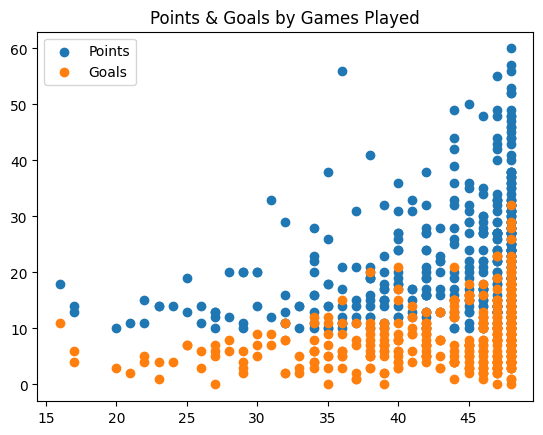

In [26]:
# Plots
import matplotlib.pyplot as plt
plt.scatter(player_data['games_played'], player_data['I_F_points'])
plt.scatter(player_data['games_played'], player_data['I_F_goals'])

plt.legend(['Points', 'Goals'])
plt.title('Points & Goals by Games Played')
plt.show()

In [27]:
# DF for Machine Learning
player_data = player_data[['playerId', 'Points per Game', '% Games Played', 'Goals per Game', 'Shots on Goal per Game',
                            'icetime', 'position']]
player_data.head()

,playerId,Points per Game,% Games Played,Goals per Game,Shots on Goal per Game,icetime,position
1,8475793,0.300000,0.487805,0.125000,0.388546,0.367292,C
16,8470144,0.604167,0.585366,0.125000,0.349536,0.578338,C
26,8470318,0.288889,0.548780,0.066667,0.065795,0.668668,D
41,8469531,0.212766,0.573171,0.063830,0.160231,0.645859,D
46,8470920,0.500000,0.585366,0.312500,0.784650,0.558928,R


### Machine Learning

In [28]:
# Separate features and labels for models
features = player_data.drop(labels = "Points per Game", axis = 1)
labels = player_data["Points per Game"]

In [29]:
features.head()

,playerId,% Games Played,Goals per Game,Shots on Goal per Game,icetime,position
1,8475793,0.487805,0.125000,0.388546,0.367292,C
16,8470144,0.585366,0.125000,0.349536,0.578338,C
26,8470318,0.548780,0.066667,0.065795,0.668668,D
41,8469531,0.573171,0.063830,0.160231,0.645859,D
46,8470920,0.585366,0.312500,0.784650,0.558928,R


In [30]:
features.shape

(394, 6)

In [31]:
labels.head()

1     0.300000
16    0.604167
26    0.288889
41    0.212766
46    0.500000
Name: Points per Game, dtype: float64

In [32]:
labels.shape

(394,)

In [33]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 100)

### Linear Regression

In [34]:
# Train a LinearRegression model
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
#lm.fit(X_train.values,y_train)
lm.fit(X_train, y_train)
print("** Linear Regression model has been trained.")
    
# Get the train and test accuracy scores
print(f"** Training Score: {lm.score(X_train, y_train)}")
print(f"** Testing Score: {lm.score(X_test, y_test)}")

# Get the train and test logloss results
#print(f"** Training LogLoss: {log_loss(y_train, lm.predict(X_train))}")
#print(f"** Testing LogLoss: {log_loss(y_test, lm.predict_proba(X_test))}")

ValueError: could not convert string to float: 'R'

In [35]:
name = "Mark Scheifele"

fn = df[df['name'].str.contains(name, case = False)]
fn.head(15)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts,Last_Season_Played


In [ ]:
# Predict
pred = lm.predict([[8476460, .70, 0.35, .5, 0.7, 2]])
print(name + " will average:", float(np.round(pred, 4)), "points per game.")

: 

### Neural Network

In [ ]:
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Activation, Dropout, Dense, Reshape, LSTM, GRU

: 

In [ ]:
# Separate features and labels for models
features = player_data.drop(labels = "Points per Game", axis = 1)
labels = player_data["Points per Game"]

: 

In [ ]:
features.head()

: 

In [ ]:
features.shape

: 

In [ ]:
#features = features.values.reshape(-1, 6, 1)

: 

In [ ]:
features.shape

: 

In [ ]:
labels.head()

: 

In [ ]:
labels.shape

: 

#### Stacked NN

In [ ]:
rnn = Sequential()

: 

In [ ]:
rnn.add(Reshape((6, 1), input_shape = (6,)))

: 

In [ ]:
rnn.add(LSTM(100, input_shape = (20, 1), return_sequences= True))
rnn.add(LSTM(200, return_sequences= True))
rnn.add(GRU(50))
rnn.add(Dense(1)) 
rnn.add(Activation('linear'))

: 

In [ ]:
rnn.compile(loss = 'mean_squared_error', optimizer = 'adam')

: 

In [ ]:
rnn.summary()

: 

In [ ]:
#from tabnanny import verbose

rnn.fit(X_train, y_train, epochs = 25, batch_size = 10, verbose = 1, validation_split= .2)

: 

In [ ]:
def get_model_perf(model_obj):
    """Get RMSE of a model for training and testing datasets"""

    score_train = model_obj.evaluate(X_train, y_train, verbose = 0)
    print('Training RMSE: %.2f RMSE' % (math.sqrt(score_train)))

    score_test = model_obj.evaluate(X_test, y_test, verbose = 0)
    print('Testing RMSE: %.2f RMSE' % (math.sqrt(score_test)))

: 

In [ ]:
get_model_perf(rnn)

: 